# Basic Python
## Part 1: Logic and String Manipulation

**1.a The DNA Helix Printer**
Write a function `print_helix(n, turns)` where `n` is the width of the helix and `turns` is the number of full cycles. The helix is formed by two strands.
* The strands oscillate using a sine-wave-like pattern.
* The characters for the strands should cycle through `A, C, G, T`.
* **Constraint:** You must handle the spacing dynamically.

**Example Output (`n=4, turns=1`):**
```text
A      A
 C    C
  G  G
   TT
  A  A
 C    C
G      G

In [22]:
def print_helix(n, turns):
    dna_chars = "ACGT"
    num_rows_per_cycle = 2 * (n - 1) + 1
    if n == 0:
        return

    for line_num in range(turns * num_rows_per_cycle):
        char_to_print = dna_chars[line_num % len(dna_chars)]
        row_in_cycle = line_num % num_rows_per_cycle
        indentation = (n - 1) - abs((n - 1) - row_in_cycle)
        spaces_between = 2 * ( (n - 1) - indentation)
        if spaces_between == 0:
            print(' ' * indentation + char_to_print * 2)
        else:
            print(' ' * indentation + char_to_print + ' ' * spaces_between + char_to_print)

# Test
print_helix(4, 1)

A      A
 C    C
  G  G
   TT
  A  A
 C    C
G      G


**1.b The Custom Sorter**
Write a function `sort_strings(s_list)` that takes a list of strings and sorts them based on the following priority rules:
1.  **Primary:** Length of the string (Ascending).
2.  **Secondary:** Number of distinct vowels (a, e, i, o, u) present in the string (Descending).
3.  **Tertiary:** Alphabetical order (Ascending).

**Example:**
Input: `["apple", "banana", "kiwi", "sky", "aieou", "z"]`
Output: `['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']`

In [23]:
def sort_strings(s_list):
    def count_distinct_vowels(s):
        vowels = set('aeiouAEIOU')
        return len(vowels.intersection(set(s)))

    def custom_sort_key(s):
        return (len(s), -count_distinct_vowels(s), s)

    return sorted(s_list, key=custom_sort_key)

# Test
data = ["apple", "banana", "kiwi", "sky", "aieou", "z"]
print(sort_strings(data))

['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']


## Part 2: Working with Data

Consider that you are processing raw data from a sensor in a physics lab. The sensor is noisy and occasionally malfunctions.

**Task:**
1.  Read the file ```sensor_logs.csv``` **without using Pandas**.
2.  **Filter:** Ignore rows where `status` is "ERR" OR `voltage` > 10.0.
3.  **Analysis:** Calculate the **Mean** and **Standard Deviation** for each sensor.

In [24]:
import math

def analyze_sensors(filename):
    # TODO: Read file, filter data, and calculate stats
    sensor_data = {}

    with open(filename, "r") as f:
        header = True
        for line in f:
            if header:
                header = False
                continue

            parts = line.strip().split(",")
            if len(parts) != 4:
                continue

            timestamp, sensor_id, voltage_str, status = parts

            try:
                voltage = float(voltage_str)
            except:
                continue
            if status == "ERR" or voltage > 10.0:
                continue

            if sensor_id not in sensor_data:
                sensor_data[sensor_id] = []
            sensor_data[sensor_id].append(voltage)

    results = {}
    for sensor_id, values in sensor_data.items():
        n = len(values)
        mean = sum(values) / n
        variance = sum((v - mean) ** 2 for v in values) / n
        std_dev = math.sqrt(variance)
        results[sensor_id] = (mean, std_dev)

    # Print results
    for sensor_id, (mean, std_dev) in results.items():
        print(f"{sensor_id} → Mean = {mean:.3f}, StdDev = {std_dev:.3f}")
    pass

analyze_sensors("sensor_log.csv")

S3 → Mean = 3.927, StdDev = 0.577
S1 → Mean = 4.026, StdDev = 0.543
S2 → Mean = 4.055, StdDev = 0.583
S4 → Mean = 3.973, StdDev = 0.584


## SciPy

### Task 1

Find the positive root of the transcendental equation: $x^2 - 5\sin(x) - 2 = 0$

In [25]:
# TODO 1
import numpy as np
from scipy.optimize import root_scalar

def f(x):
    return x**2 - 5 * np.sin(x) - 2
sol = root_scalar(f, bracket=[0, 5], method='brentq')

print("Root:", sol.root)

Root: 2.3542389483370147


### Task 2
Simulate a radioactive decay chain: $A \to B \to C$ (Stable).

* $\frac{dA}{dt} = -k_1 A$
* $\frac{dB}{dt} = k_1 A - k_2 B$
* $\frac{dC}{dt} = k_2 B$

Given $k_1 = 0.5$, $k_2 = 0.1$. Initial conditions: $A_0 = 100$, $B_0 = 0$, $C_0 = 0$.

You have to find the concentration of **B at t = 5.0**.

In [26]:
# TODO 2
# You can define any helper function if needed
import numpy as np
from scipy.integrate import solve_ivp

k1 = 0.5
k2 = 0.1

def decay_chain(t, y):
    A, B, C = y
    dA_dt = -k1 * A
    dB_dt = k1 * A - k2 * B
    dC_dt = k2 * B
    return [dA_dt, dB_dt, dC_dt]

# initial conditions
y0 = [100.0, 0.0, 0.0]

# integrate from t=0 to t=5
sol = solve_ivp(decay_chain, t_span=(0.0, 5.0), y0=y0, t_eval=[5.0])

A_5, B_5, C_5 = sol.y[:, 0]

print("B at t=5.0:", B_5)


B at t=5.0: 65.5518353591489


# The N-Body Problem
In classical mechanics, the Two-Body problem (e.g., Earth-Moon) has an analytical solution. However, adding a third body makes the system unsolvable by pen and paper. To predict the motion of star clusters or galaxies, we solve the **N-Body problem** numerically.

**Objective:** Your task is to implement a vectorized N-Body simulation using Python and NumPy.

**Important: You are not allowed to use any loops for physics calculations.**

### The Physics & The Numerical Problem

The acceleration $\vec{a}_i$ acting on particle $i$ is the sum of gravitational forces from all other particles $j$.
$$\vec{a}_i = \sum_{j \neq i} G \cdot m_j \cdot \frac{\vec{r}_j - \vec{r}_i}{|\vec{r}_j - \vec{r}_i|^3}$$

**The Numerical Issue:**
As particles get close, $|\vec{r}_j - \vec{r}_i| \to 0$, causing the force to shoot to infinity (Singularity). In a discrete time-step simulation, this flings particles out of the galaxy at unphysical speeds.

**Q. Explain, how would you overcome this issue (you may introduce additional parameters if needed)?**

**Q. Does the value of your param ```affect``` your results? If they do then explain how.**

### Setup and Initialization

Run this cell to import libraries and set up the simulation environment. **Do not modify this cell.**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Simulation Parameters

G = 1.0           # Gravitational Constant
PARAM = 0.1       # Your parameter (if needed)
DT = 0.01         # Time step
STEPS = 200       # Number of steps
N_PARTICLES = 100 # Number of particles

def generate_initial_state(N, seed=42):
    """
    Generates N random particles.
    Returns:
        positions: (N, 2) array
        velocities: (N, 2) array
        masses: (N,) array
    """
    np.random.seed(seed)
    positions = np.random.randn(N, 2)
    velocities = np.random.randn(N, 2) * 0.5
    masses = np.random.rand(N) + 0.5 # Masses between 0.5 and 1.5
    return positions, velocities, masses

In [27]:
# TODO 1 : Calculates the net acceleration on every particle due to every other particle.
# You should return accelerations as a (N, 2) numpy array representing a_x, a_y

def calculate_accelerations(positions, masses, G=1.0, param=0.1):
    """
    positions: (N, 2)
    masses:    (N,)
    Returns:
        accelerations: (N, 2)
    """
    positions_i = positions[:, None, :]
    positions_j = positions[None, :, :]
    displacement = positions_j - positions_i
    dist_sq = np.sum(displacement**2, axis=2) + param**2
    inv_dist3 = dist_sq**(-1.5)
    m_j = masses[None, :]
    factors = G * m_j * inv_dist3
    accelerations = np.sum(factors[..., None] * displacement, axis=1)

    return accelerations


In [28]:
# TODO 2: Updates the simulation by one timestep.

def symplectic_euler_step(positions, velocities, accelerations, dt):
    velocities_new = velocities + accelerations * dt
    positions_new = positions + velocities_new * dt

    return positions_new, velocities_new

## Visualization

If your code is correct, this block will run the simulation and produce a plot.

**Note:** This block checks if your functions are implemented. If they return `None` or zeros, the plot will look static or empty.

Simulation of 100 particles for 200 steps took: 0.2091s


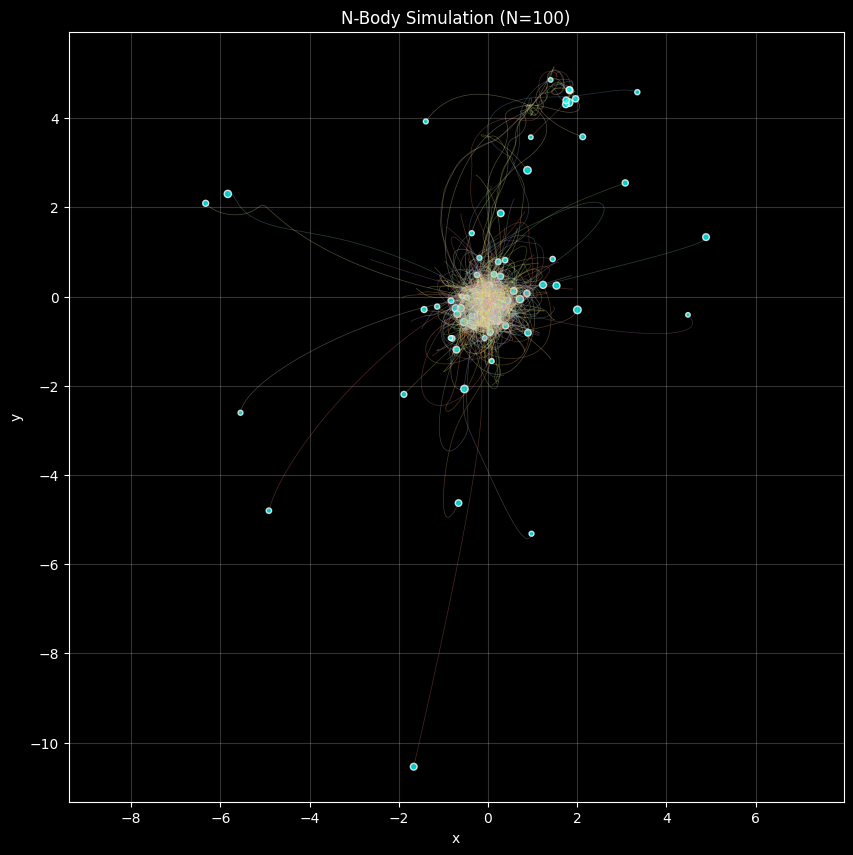

In [29]:
def run_simulation(N=100, steps=200, dt=0.01):
    positions, velocities, masses = generate_initial_state(N)

    trajectory_history = []
    trajectory_history.append(positions.copy())

    start_time = time.time()

    for _ in range(steps):
        # Calculate forces
        acc = calculate_accelerations(positions, masses, G, PARAM)

        # Integrate
        positions, velocities = symplectic_euler_step(positions, velocities, acc, dt)

        # Store history
        trajectory_history.append(positions.copy())

    end_time = time.time()
    print(f"Simulation of {N} particles for {steps} steps took: {end_time - start_time:.4f}s")

    return np.array(trajectory_history), masses

# Main Simualtion
history, masses = run_simulation(N=N_PARTICLES, steps=STEPS, dt=DT)

plt.figure(figsize=(10, 10))
plt.style.use('dark_background')

for i in range(N_PARTICLES):
    plt.plot(history[:, i, 0], history[:, i, 1], alpha=0.3, lw=0.5)

# Plot final positions
plt.scatter(history[-1, :, 0], history[-1, :, 1], s=masses*20, c='cyan', alpha=0.8, edgecolors='white')

plt.title(f"N-Body Simulation (N={N_PARTICLES})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.2)
plt.axis('equal')
plt.show()

## Conservation of Energy

A good physics simulation must conserve energy.
* **Kinetic Energy (T):** $T = \frac{1}{2} \sum m_i v_i^2$
* **Potential Energy (U):** $U = -\frac{1}{2} \sum_i \sum_{j \neq i} \frac{G m_i m_j}{r_{ij}}$

**Note that the energy functions can also change depending on how you chose the parameter, so if you make any such modification, explain that clearly.**

**Task:** Implement the energy calculation.

In [30]:
# TODO 3: Calculate the Total Energy (Kinetic + Potential).

def calculate_total_energy(positions, velocities, masses, G=1.0, param=0.1):
    # --------- Kinetic Energy ---------
    speed_sq = np.sum(velocities**2, axis=1)
    T = 0.5 * np.sum(masses * speed_sq)

    # --------- Potential Energy ---------
    pos_i = positions[:, None, :]
    pos_j = positions[None, :, :]
    displacement = pos_j - pos_i

    # Distance matrix with softening (N, N)
    dist_sq = np.sum(displacement**2, axis=2) + param**2
    dist = np.sqrt(dist_sq)

    # Pairwise mass products (N, N)
    mass_matrix = masses[:, None] * masses[None, :]

    np.fill_diagonal(dist, np.inf)
    U = -0.5 * np.sum(G * mass_matrix / dist)

    return T + U

## Advanced Integration with SciPy

In computational physics, we often use established libraries to verify our manual implementations. SciPy's `solve_ivp` is a powerful integrator with adaptive time-stepping.

**The Challenge:** `solve_ivp` requires the system state to be a **1D array**. You currently have 2D arrays for positions and velocities.

**TODO:**
1.  Flatten your initial `positions` and `velocities` into a single 1D array `y0`.
2.  Implement the derivative function `nbody_ode(t, y, masses, ...)` which:
    * Unpacks the 1D `y` back into `positions` and `velocities`.
    * Calculates `accelerations` using your function from Task 1.
    * Returns the derivatives (velocities and accelerations) as a flattened 1D array.
3.  Run the solver.

## 8. Task 4: Advanced Integration with SciPy

In computational physics, we often use established libraries to verify our manual implementations. SciPy's `solve_ivp` is the industry standard for solving ODEs.

But `solve_ivp` requires the system state to be a **single 1D array**, but your physics simulation uses separate 2D arrays for position and velocity.

**Task:**
2.  Run the simulation using `solve_ivp`.

In [31]:
from scipy.integrate import solve_ivp

# TODO 4: Implement a function nbody_ode that bridges the gap between scipy 1D requirement and your 2D logic.

def nbody_ode(t, y, masses, G, param): # Added 'param' to the function signature
    """
    This function takes in
        t: float, current time
        y: 1D numpy array, current state vector
        masses: (N,) array
        G: float

    This should return an array (dydt) i.e.
        1D numpy array, which time derivative of the state vector
    """
    N = masses.size
    # TODO 4.1: Unpack the 1D state vector 'y' into positions (N, 2) and velocities (N, 2)
    pos_flat = y[:2 * N]
    vel_flat = y[2 * N:]
    positions = pos_flat.reshape(N, 2)
    velocities = vel_flat.reshape(N, 2)
    # TODO 4.2: Calculate accelerations
    accelerations = calculate_accelerations(positions, masses, G=G, param=param)
    # Hint: you can reuse your previous functio)

    # TODO 4.3: Pack the derivatives (velocities and accelerations) back into a 1D array
    dydt = np.concatenate([velocities.reshape(-1), accelerations.reshape(-1)])
    return dydt # Placeholder

In [32]:
# TODO 5: Run the simulation using solve_ivp.

N_SCIPY = 10
pos_s, vel_s, mass_s = generate_initial_state(N_SCIPY)
t_span = (0, 2.0)
print(f"Running SciPy Integrator for N={N_SCIPY}...")

# TODO 5.1: Prepare the initial 1D state vector 'y0' from pos_s and vel_s
y0 = np.concatenate([pos_s.reshape(-1), vel_s.reshape(-1)])
# TODO 5.2: Call solve_ivp
sol = solve_ivp(
    fun=lambda t, y: nbody_ode(t, y, mass_s, G=G, param=PARAM),
    t_span=t_span,
    y0=y0,
    rtol=1e-6,
    atol=1e-9,
    dense_output=False
)
# sol = solve_ivp(...)

if sol:
    print(f"SciPy solved in {len(sol.t)} steps.")
    print(f"Final shape of solution: {sol.y.shape}")

Running SciPy Integrator for N=10...
SciPy solved in 246 steps.
Final shape of solution: (40, 246)


# Damped coupled oscillators

The bobs of two pendulums are connected by a spring, forming a coupled oscillator system. Real systems always have some damping, in which mechanical energy is slowly converted to heat. For this problem we model the damping as a force proportional to velocity. Assume that the spring is ideal and that the system is placed on the surface of an unknown extremely large planet. Let $\theta_1$ and $\theta_2$ denote the angles that pendulum strings make with the vertical and $t$ denote time. The equations governing the motion of the system can be written as

$$ \frac{d^2 \theta_1}{d t^2} = -c_1 \frac{d \theta_1}{d t} - k_1 \theta_1 -k_c (\theta_1 - \theta_2)$$
$$ \frac{d^2 \theta_2}{d t^2} = -c_2 \frac{d \theta_2}{d t} - k_1 \theta_2 -k_c (\theta_2 - \theta_1)$$

The file `data.csv` provides you measurements for $\theta_1$ and $\theta_2$ with time. Your task is to find $c_1, c_2, k_1, k_2, k_c$ using python (numpy and/or pandas). Note that the data might have noise and also be partially corruped due to limitations of measuring instruments.  Plot the values of $\theta_1$ and $\theta_2$ predicted using the constants calculated above against the measured values. Assume arbitrary (but consistent) unit system.

Fitted parameters:
c1 = 23.7691, c2 = 50.1035, k1 = 82.5651, k2 = 67.3835, kc = 18.5197


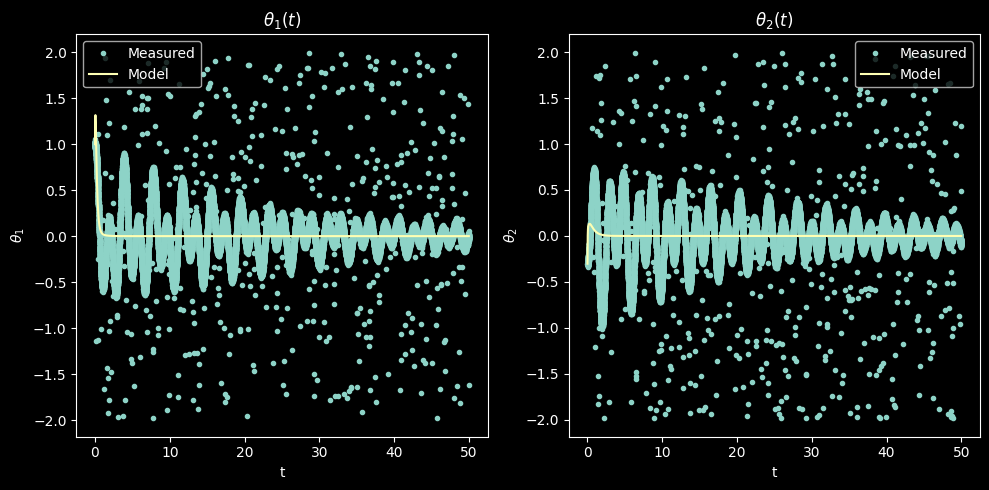

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares


data = np.loadtxt("data (1).csv", delimiter=",", skiprows=1)
t_data   = data[:, 0]
theta1_d = data[:, 1]
theta2_d = data[:, 2]

mask = np.isfinite(theta1_d) & np.isfinite(theta2_d) & np.isfinite(t_data)
t_data   = t_data[mask]
theta1_d = theta1_d[mask]
theta2_d = theta2_d[mask]

def osc_ode(t, y, c1, c2, k1, k2, kc):
    theta1, omega1, theta2, omega2 = y

    domega1 = -c1 * omega1 - k1 * theta1 - kc * (theta1 - theta2)
    domega2 = -c2 * omega2 - k2 * theta2 - kc * (theta2 - theta1)

    return [omega1, domega1, omega2, domega2]

def simulate(params):
    c1, c2, k1, k2, kc = params
    dt0 = t_data[1] - t_data[0]
    omega1_0 = (theta1_d[1] - theta1_d[0]) / dt0
    omega2_0 = (theta2_d[1] - theta2_d[0]) / dt0

    y0 = [theta1_d[0], omega1_0, theta2_d[0], omega2_0]

    sol = solve_ivp(
        fun=lambda t, y: osc_ode(t, y, c1, c2, k1, k2, kc),
        t_span=(t_data[0], t_data[-1]),
        y0=y0,
        t_eval=t_data,
        rtol=1e-6,
        atol=1e-9
    )

    theta1_model = sol.y[0]
    theta2_model = sol.y[2]
    return theta1_model, theta2_model

def residuals(params):
    theta1_model, theta2_model = simulate(params)
    return np.concatenate([
        theta1_model - theta1_d,
        theta2_model - theta2_d
    ])

p0 = np.array([0.1, 0.1, 1.0, 1.0, 0.5])

result = least_squares(residuals, p0, bounds=(0, np.inf))
c1_fit, c2_fit, k1_fit, k2_fit, kc_fit = result.x

print("Fitted parameters:")
print(f"c1 = {c1_fit:.4f}, c2 = {c2_fit:.4f}, k1 = {k1_fit:.4f}, k2 = {k2_fit:.4f}, kc = {kc_fit:.4f}")

# ---- Simulate with fitted parameters for plotting ----
theta1_model, theta2_model = simulate(result.x)

# ---- Plot measured vs predicted ----
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(r"$\theta_1(t)$")
plt.plot(t_data, theta1_d, '.', label="Measured")
plt.plot(t_data, theta1_model, '-', label="Model")
plt.xlabel("t")
plt.ylabel(r"$\theta_1$")
plt.legend()

plt.subplot(1, 2, 2)
plt.title(r"$\theta_2(t)$")
plt.plot(t_data, theta2_d, '.', label="Measured")
plt.plot(t_data, theta2_model, '-', label="Model")
plt.xlabel("t")
plt.ylabel(r"$\theta_2$")
plt.legend()

plt.tight_layout()
plt.show()
